BY: Abdulkodri Mubarak
According to the information in the dataset, the class (edible=e, poisonous=p.
The problem should be addressed by creating a binary classification model.
Throughout this Notebook, I will create different models and compare their performance for the classification of mushrooms.In this notebook, I will be dealing with the mushroom classification by working on the EDA of this datasets by using seaborn and plotly and also implemeting Logistic Regression,DecisionTreeClassifier and RandomForest Classifier.
                                                        

In [238]:
#import the require library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

import plotly.figure_factory as ff
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")

In [239]:
#import the datasets
df_data=pd.read_csv("mushrooms.csv")
df_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [240]:
#Data desription
df_data.shape

(8124, 23)

In [241]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [242]:
df_data.describe(include="all").transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [243]:
df_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [244]:
df_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [245]:
df_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

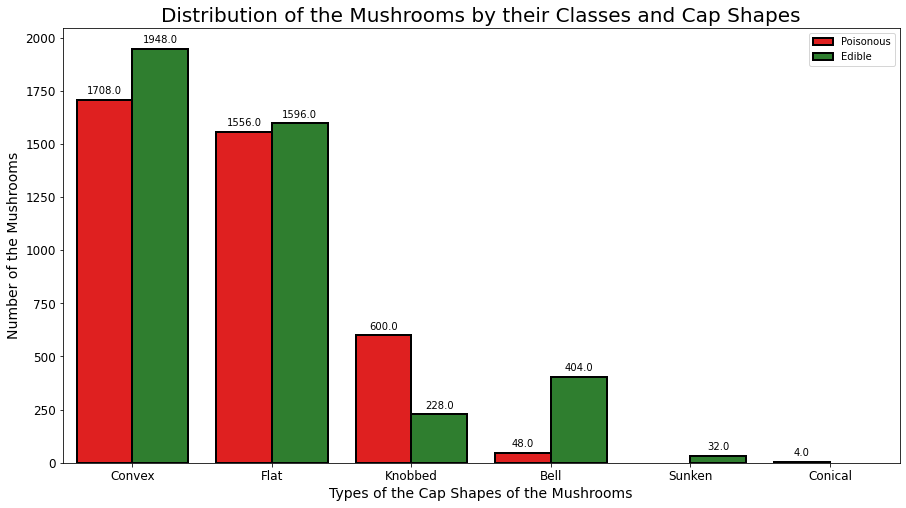

In [247]:
#Data Exploratory
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='cap-shape',
                      hue='class',
                      order=df_data['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Cap Shapes. The x-axis represents that the Types of the Cap Shapes of the Mushrooms and the y-axis represents that the Number of the Mushrooms. According to this graph, the Convex Cap Shape is the most frequent. The Edible and Poisonous class mushrooms are pretty close to each other for the Convex and the Flat type. In contrast, for the following types which are Kobbed and Bell, the class types are pretty imbalanced distributed. The Sunken and the Conical types are completely edible.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surface')

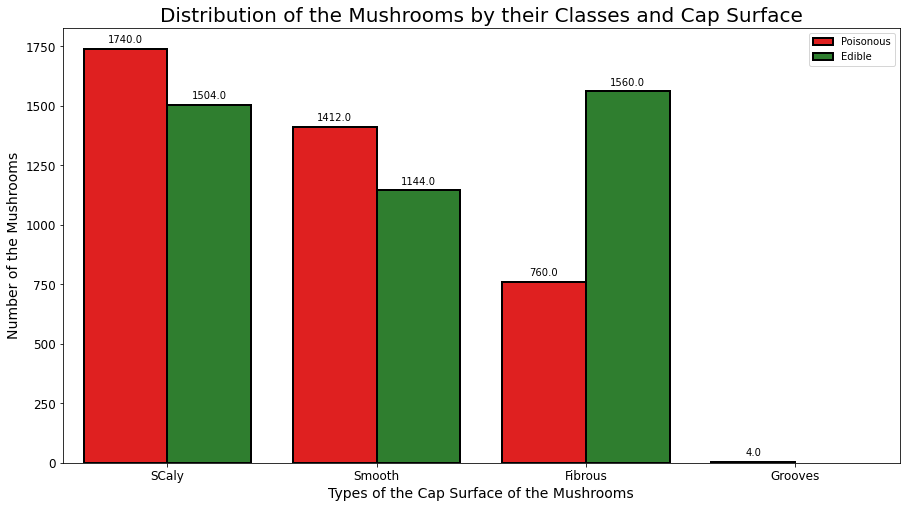

In [248]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='cap-surface',
                      hue='class',
                      order=df_data['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['SCaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surface of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surface', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Cap Surfaces. The x-axis represents that the Types of the Cap Surfaces of the Mushrooms and the y-axis represents that the Number of the Mushrooms. As seen from the figure, the Scaly and Smooth types are high probability poisonous. In contrast, the Fibrous type is mostly edible.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Color')

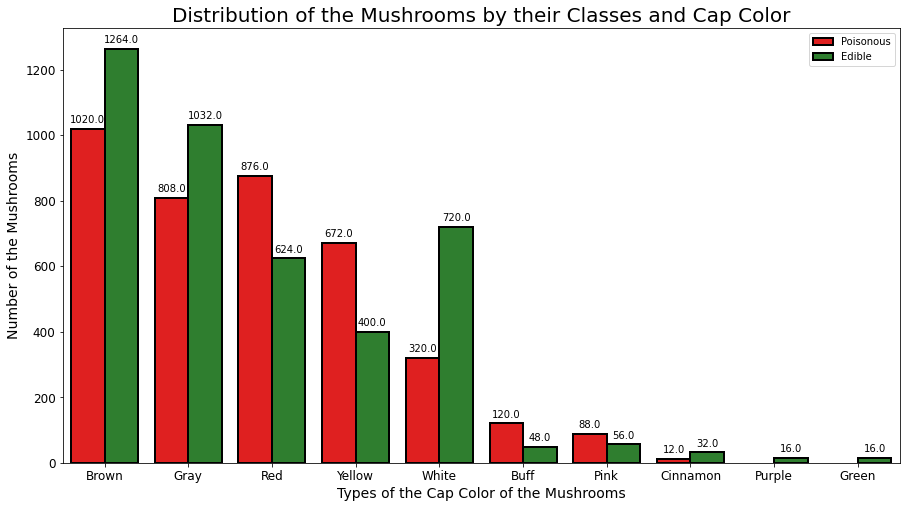

In [249]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='cap-color',
                      hue='class',
                      order=df_data['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow',"White","Buff","Pink","Cinnamon","Purple","Green"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Color of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Color', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Cap Colors. The x-axis represents that The Cap Colors of the Mushrooms and the y-axis represents that the Number of the Mushrooms. According to this graph, the Edible and Poisonous class mushrooms are pretty close to each other for Brown, Gray, and Red cap colors. The White cap-colored mushrooms are highly edible. Purple and Green cape-colored mushrooms have no poisonous class.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Bruises')

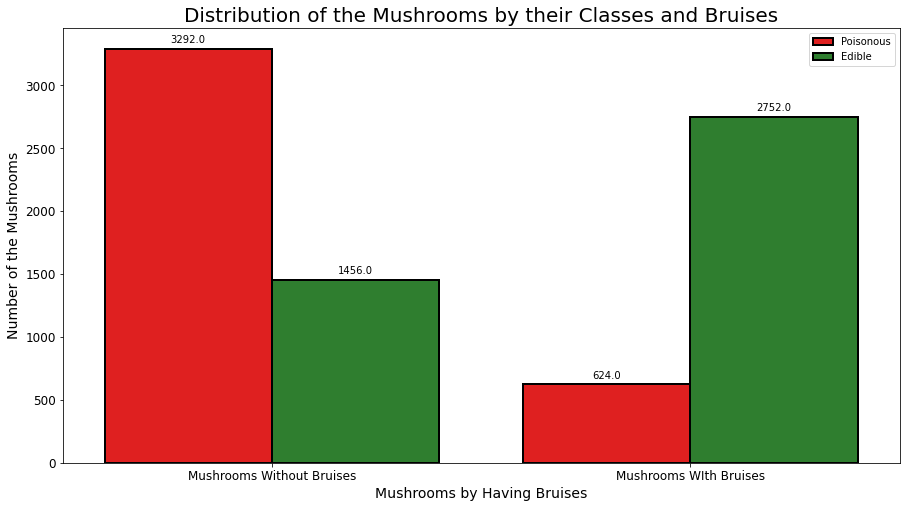

In [250]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='bruises',
                      hue='class',
                      order=df_data['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms Without Bruises', 'Mushrooms WIth Bruises',])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Mushrooms by Having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Bruises', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Bruises. The x-axis represents that mushrooms by having Bruises and, the y-axis represents that the Number of Mushrooms. As you can see from the graph above, Mushrooms without Bruises are high frequently poisonous. In contrast, the Mushrooms with the Bruises are highly edible.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Odor')

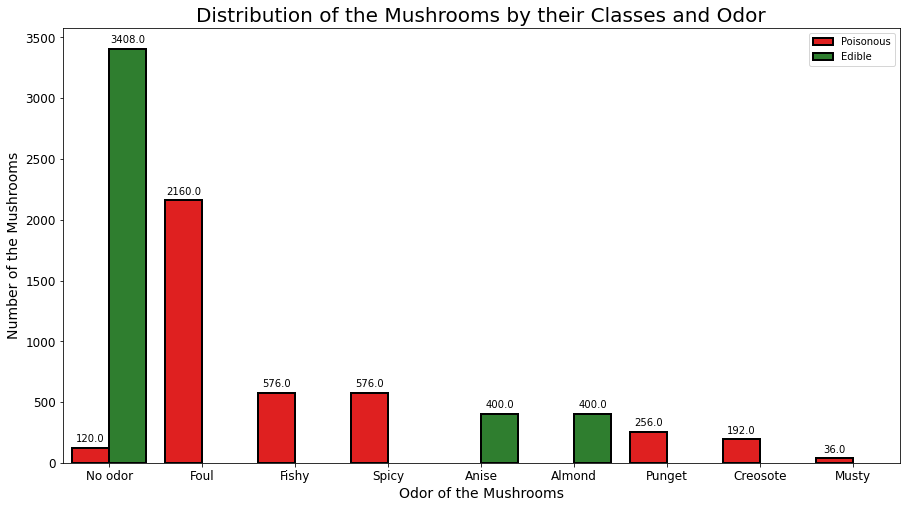

In [251]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='odor',
                      hue='class',
                      order=df_data['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No odor', 'Foul', 'Fishy', 'Spicy',"Anise","Almond","Punget","Creosote","Musty"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Odor', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Odors. The x-axis represents that the Odor of the Mushrooms and, the y-axis represents that the Number of Mushrooms. According to the graph above, mushrooms with no odor are highly safe for humans. But the mushrooms with the Foul, Fishy, and Spicy odor are high frequently poisonous. The mushrooms with the Anise and Almond odor have no poisonous class.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Attachments')

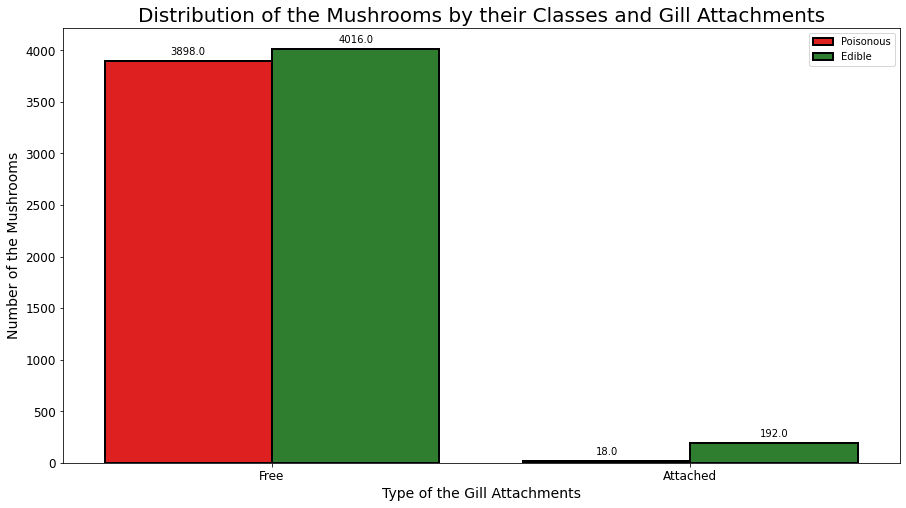

In [252]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='gill-attachment',
                      hue='class',
                      order=df_data['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Gill Attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Attachments', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Gill Attachments. The x-axis represents that the Types of the Gill Attachments and, the y-axis represents that the Number of Mushrooms. The dataset has high frequently Free type gill attachments. According to this graph, the Free type gill attachments are approximately equally distributed. In contrast, the Attached type gill attachments are most frequently edible.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Spacing')

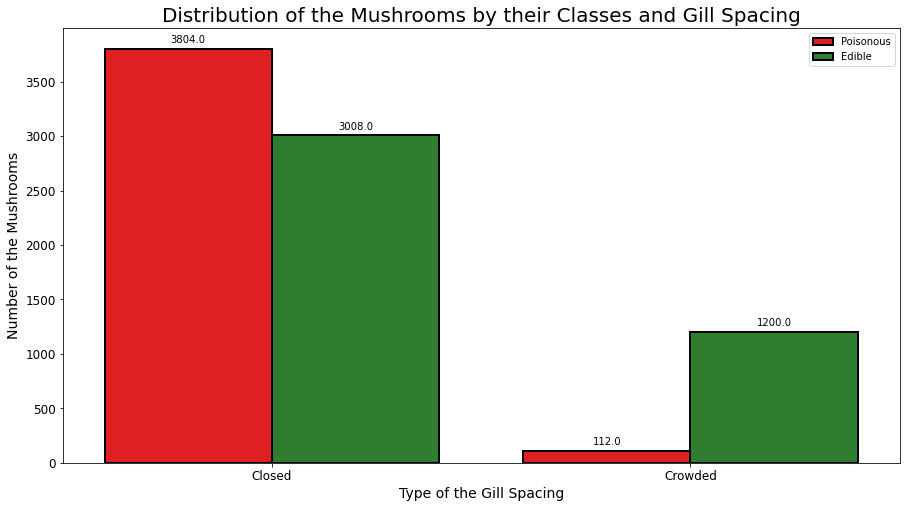

In [253]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='gill-spacing',
                      hue='class',
                      order=df_data['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Closed', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Gill Spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Spacing', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Gill Spacing. The x-axis represents that the Types of the Gill Spacing and, the y-axis represents that the Number of Mushrooms. According to this figure, the Crowded type gill spacing is high frequently edible. In contrast, we cannot say the same thing for the Close-type gill spacing mushrooms. Their class distribution by gill spacing is pretty close to each other.

In [254]:
df_data["gill-spacing"].unique()

array(['c', 'w'], dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Gill Color')

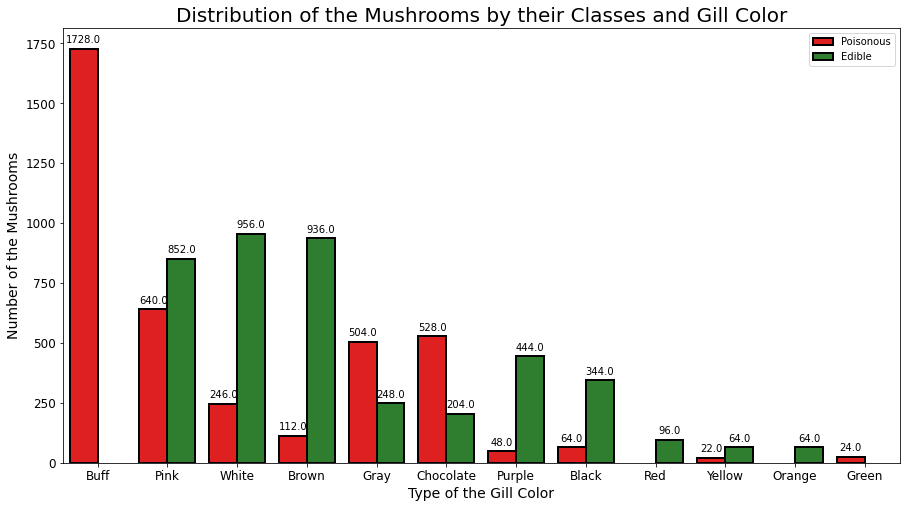

In [255]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='gill-color',
                      hue='class',
                      order=df_data['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Buff',"Pink","White","Brown","Gray","Chocolate","Purple","Black","Red","Yellow","Orange","Green"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Gill Color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Gill Color', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Gill Colors. The x-axis represents that the Types of the Gill Colors and, the y-axis represents that the Number of Mushrooms. As seen from the figure above, the Buff-colored gills are highly poisonous. In contrast, the White, Brown, Purple, Black, and Red gill colors are high frequently edible.

In [256]:
df_data["gill-color"].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalks Surface Below Ring')

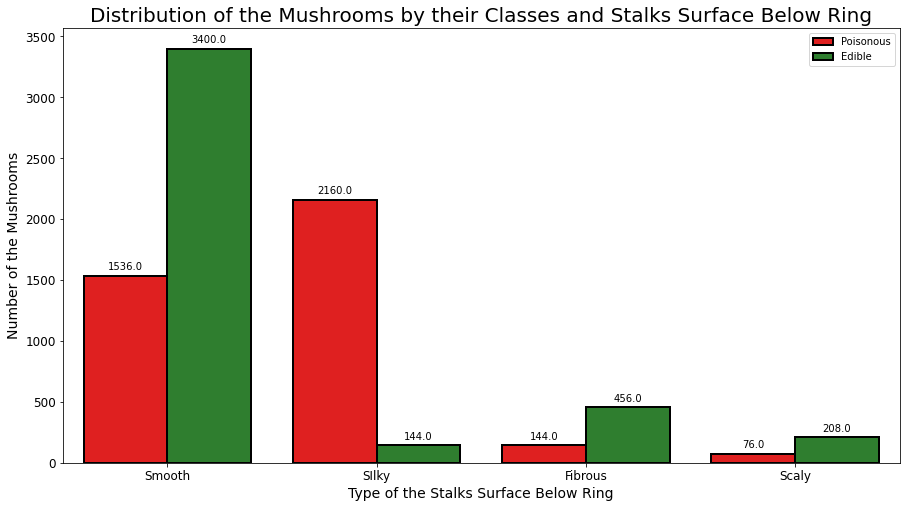

In [257]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='stalk-surface-below-ring',
                      hue='class',
                      order=df_data['stalk-surface-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["Smooth","SIlky","Fibrous","Scaly"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Stalks Surface Below Ring', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalks Surface Below Ring', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Types of Stalk Surfaces Below the Ring. The x-axis represents the Types of Stalk Surfaces Below the Ring and, the y-axis represents that the Number of Mushrooms.


In [258]:
df_data["stalk-surface-below-ring"].unique()

array(['s', 'f', 'y', 'k'], dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalks Color Above Ring')

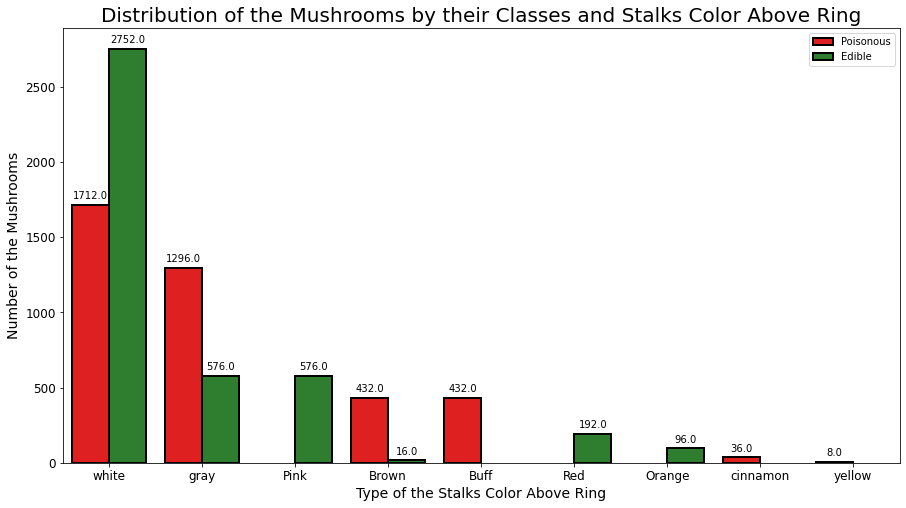

In [259]:

plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='stalk-color-above-ring',
                      hue='class',
                      order=df_data['stalk-color-above-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["white","gray","Pink","Brown","Buff","Red","Orange","cinnamon","yellow"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Stalks Color Above Ring', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalks Color Above Ring', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Types of Stalk Color Above the Ring. The x-axis represents the Types of Stalk Color Above the Ring and, the y-axis represents that the Number of Mushrooms.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Stalks Color Below Ring')

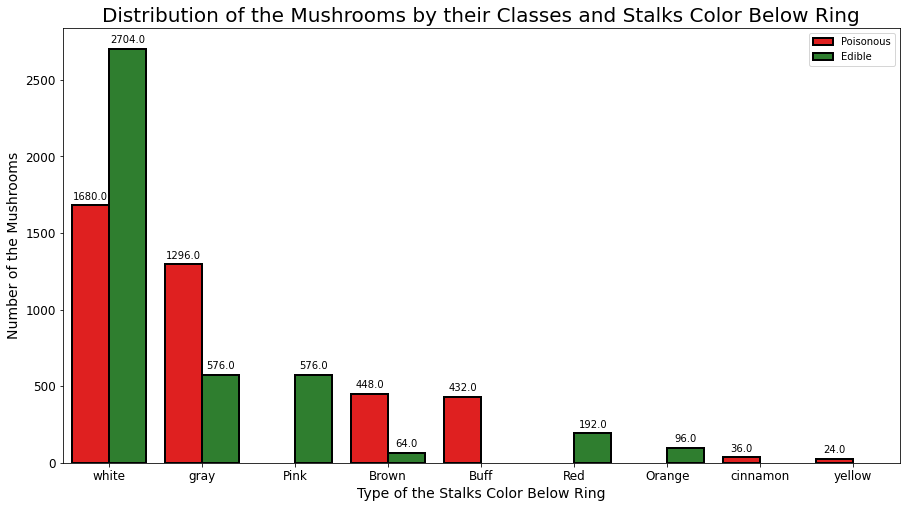

In [260]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='stalk-color-below-ring',
                      hue='class',
                      order=df_data['stalk-color-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["white","gray","Pink","Brown","Buff","Red","Orange","cinnamon","yellow"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Stalks Color Below Ring', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Stalks Color Below Ring', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Types of Stalk Color Below the Ring. The x-axis represents the Types of Stalk Color Below the Ring and, the y-axis represents that the Number of Mushrooms.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Veil Type')

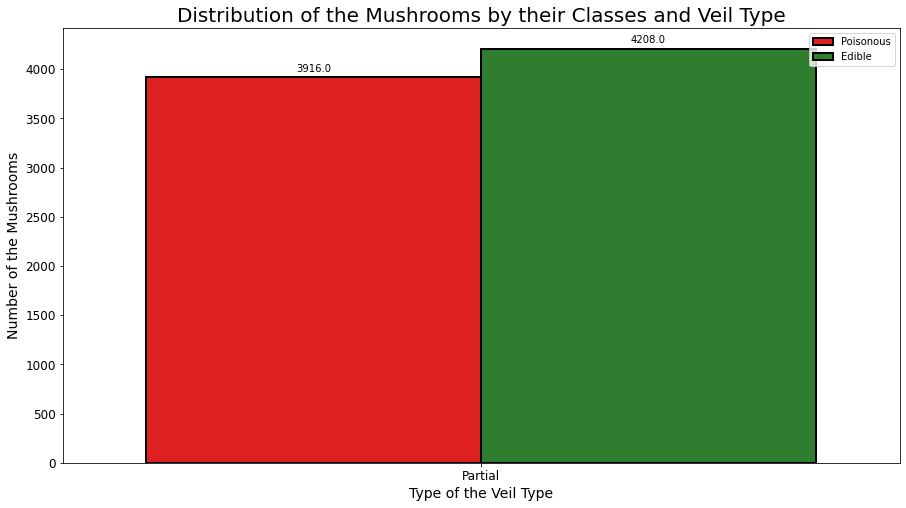

In [261]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='veil-type',
                      hue='class',
                      order=df_data['veil-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["Partial"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Veil Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Veil Type', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Veil Types. The x-axis represents the Veil Types and, the y-axis represents that the Number of Mushrooms. In this dataset, we have only Partial type Veils. As you can see, most of them are edible but the number of the poisonous class mushrooms are pretty close to the edible class of mushrooms.

In [262]:
df_data["veil-type"].unique()

array(['p'], dtype=object)

In [263]:
df_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Veil Color')

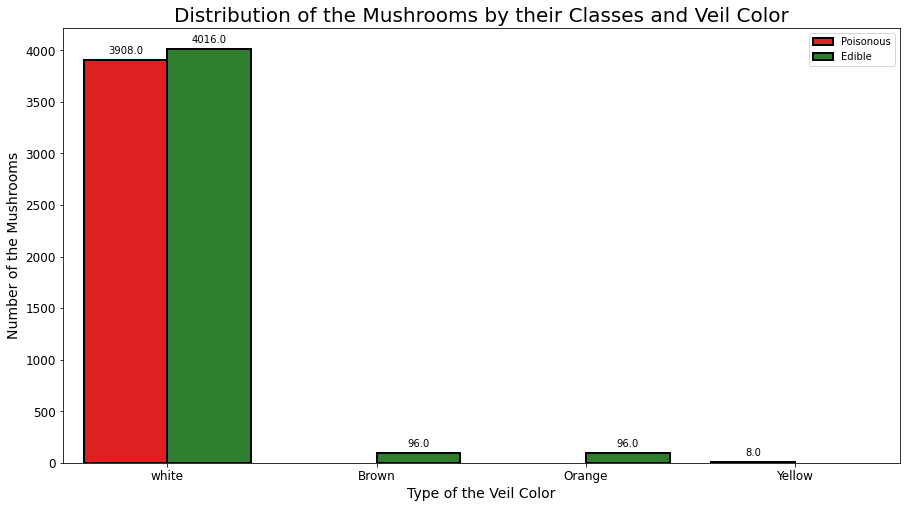

In [264]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='veil-color',
                      hue='class',
                      order=df_data['veil-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["white","Brown","Orange","Yellow"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Type of the Veil Color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Veil Color', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Veil Colors. The x-axis represents the Veil Colors and, the y-axis represents that the Number of Mushrooms. According to our dataset, most of the mushrooms have White colors. The class distribution of the White-colored Veils is approximately equal. The Brown, Orange, and Yellow Veil-colored mushrooms have no poisonous class.

In [265]:
df_data["veil-color"].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Ring Number')

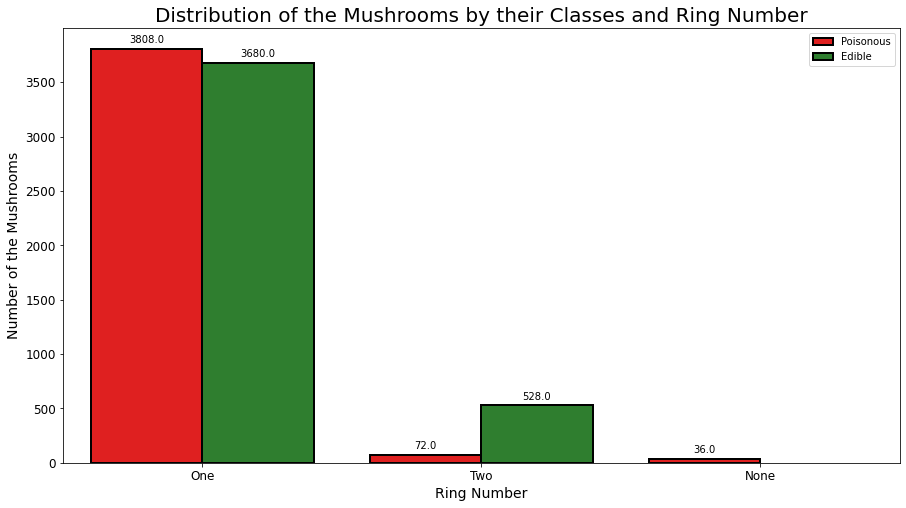

In [266]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='ring-number',
                      hue='class',
                      order=df_data['ring-number'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["One","Two","None"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Ring Number', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Ring Number', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Ring Number. The x-axis represents the Ring Number and, the y-axis represents that the Number of Mushrooms.

In [267]:
df_data["ring-number"].unique()

array(['o', 't', 'n'], dtype=object)

In [268]:
df_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Ring Type')

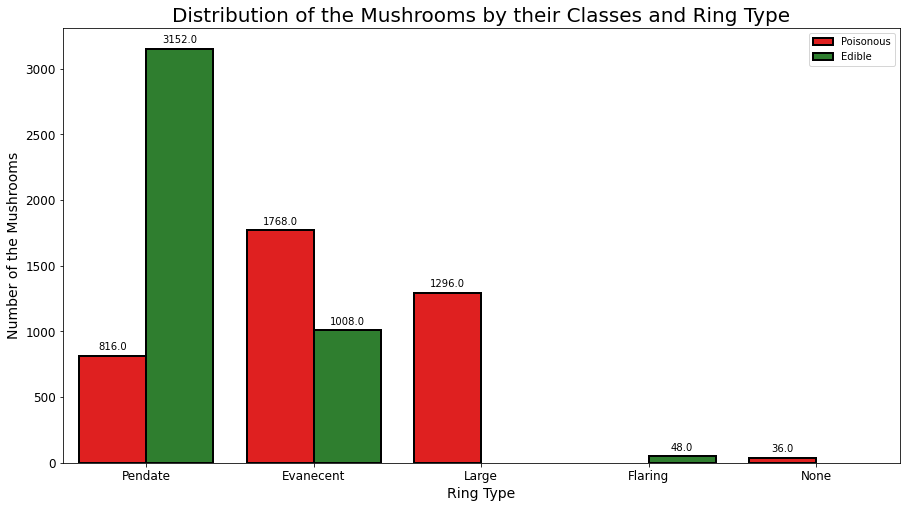

In [269]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='ring-type',
                      hue='class',
                      order=df_data['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["Pendate","Evanecent","Large","Flaring","None"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Ring Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Ring Type', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Ring Types. The x-axis represents the Ring Types and, the y-axis represents that the Number of Mushrooms. As seen from the graph, the mushrooms with the Pendant type are high frequently edible. In contrast, the mushrooms with the Large type have only the poisonous class.

In [270]:
df_data["ring-type"].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Spore Print Color')

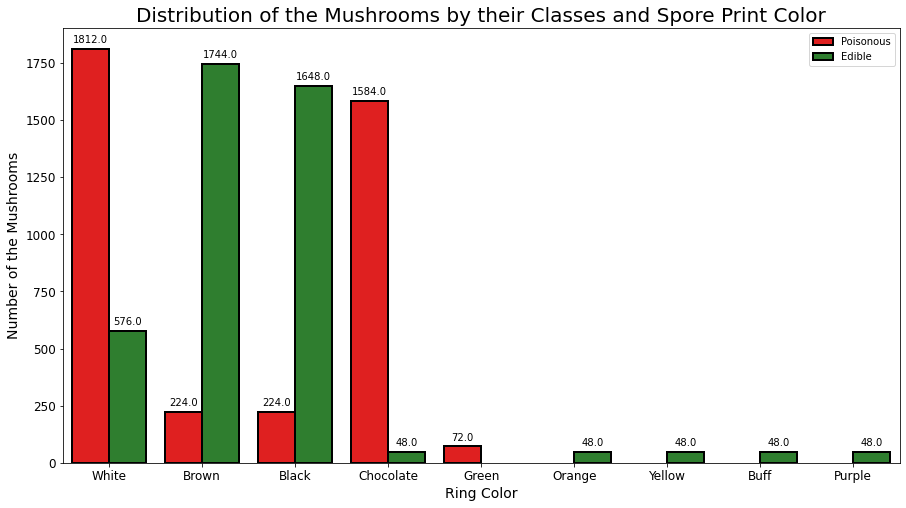

In [271]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='spore-print-color',
                      hue='class',
                      order=df_data['spore-print-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["White","Brown","Black","Chocolate","Green","Orange","Yellow","Buff","Purple"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Ring Color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Spore Print Color', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Spore Print Colors. The x-axis represents the Spore print Colors and, the y-axis represents that the Number of Mushrooms. As seen from the figure, the White and Chocolate spore print colored mushrooms are high frequently poisonous. In contrast, the mushrooms with the Brown and Black spore print colors are high frequently edible.

In [272]:
df_data["spore-print-color"].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Population')

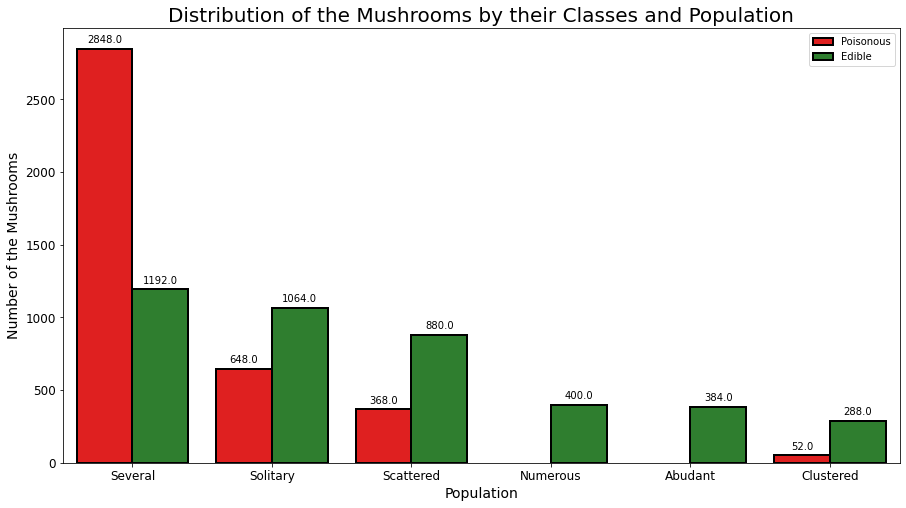

In [273]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='population',
                      hue='class',
                      order=df_data['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["Several","Solitary","Scattered","Numerous","Abudant","Clustered"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Population', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Population', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Classes and Populations. The x-axis represents the Populations and, the y-axis represents that the Number of Mushrooms. According to the graph above, the mushrooms populated as Several types are highly poisonous. In contrast, the mushrooms with Numerous, Abundant, and Clustered populations are pretty edible.

In [274]:
df_data["population"].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Habitat')

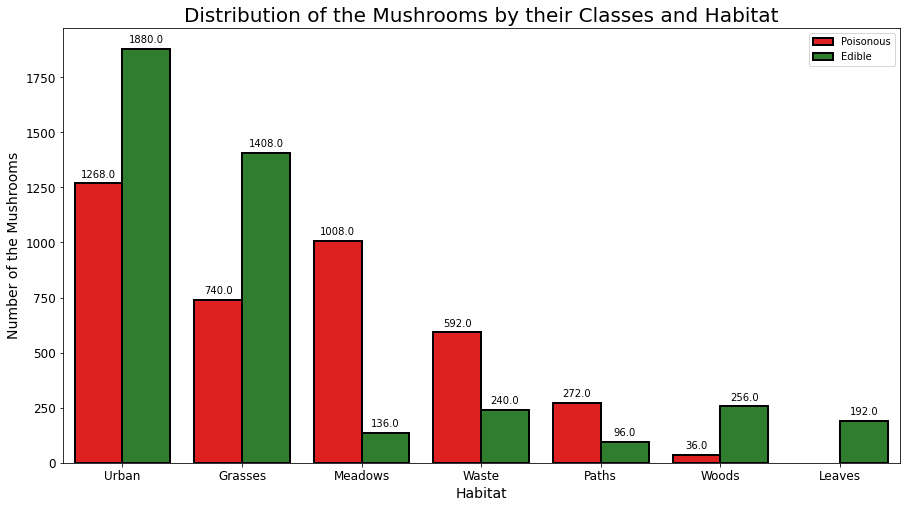

In [275]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df_data, x='habitat',
                      hue='class',
                      order=df_data['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(["Urban","Grasses","Meadows","Waste","Paths","Woods","Leaves"])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitat', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Habitat', fontsize=20)

The Figure above represents the Distribution of the Mushrooms by their Habitats and Populations. The x-axis represents the Habitats and, the y-axis represents that the Number of Mushrooms.

In [276]:
df_data["habitat"].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [277]:
df_data.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [278]:
#Declare Features and Target
X = df_data.drop(["class"], axis=1)
y = df_data["class"]

#Data Preprocessing
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

In [279]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [280]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [281]:
#Preparing the data for model fitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#Iplementing Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print the accuracy score of the model
print(accuracy_score(y_test,y_pred))

1.0


In [282]:
#checking for overfitting and Underfitting
print(model.score(x_train,y_train))
print()
print(model.score(x_test,y_test))

1.0

1.0


In [283]:
#print the classification report and the confusion matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [284]:
print(confusion_matrix(y_test,y_pred))

[[1257    0]
 [   0 1181]]


In [285]:
#Implemnting Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [286]:
y_pred=model.predict(x_test)
#print the accuracy score
print(accuracy_score(y_test,y_pred))

0.9819524200164069


In [287]:
#Checking for the overfitting and the underfitting
print(model.score(x_test,y_test))

0.9819524200164069


In [288]:
print(model.score(x_train,y_train))

0.9866338374956032


we can see that this model is good for the classification

[Text(386.3076923076923, 380.52, 'X[27] <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(206.03076923076924, 271.8, 'X[53] <= 0.5\ngini = 0.28\nsamples = 3191\nvalue = [537, 2654]'),
 Text(103.01538461538462, 163.07999999999998, 'X[55] <= 0.5\ngini = 0.122\nsamples = 2809\nvalue = [184, 2625]'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.044\nsamples = 2685\nvalue = [60, 2625]'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(309.04615384615386, 163.07999999999998, 'X[94] <= 0.5\ngini = 0.14\nsamples = 382\nvalue = [353, 29]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(360.55384615384617, 54.360000000000014, 'gini = 0.0\nsamples = 353\nvalue = [353, 0]'),
 Text(566.5846153846154, 271.8, 'X[100] <= 0.5\ngini = 0.063\nsamples = 2495\nvalue = [2414, 81]'),
 Text(515.0769230769231, 163.07999999999998, 'X[63] <= 0.5\ngini = 0.026\nsamples = 2446\nvalue 

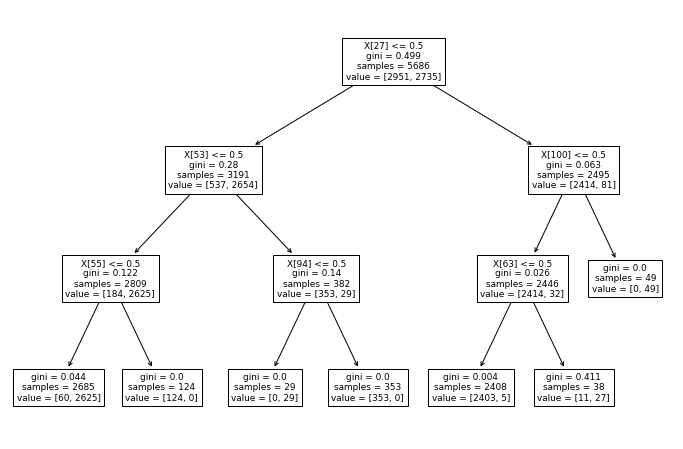

In [289]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(x_train,y_train))

In [290]:
#print classification report and confusion matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1257
           1       0.97      1.00      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [291]:
print(confusion_matrix(y_test,y_pred))

[[1216   41]
 [   3 1178]]


In [292]:
#Implemnting Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [293]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9540607054963085


In [294]:
#Checking for the overfitting and the underfitting
print(model.score(x_test,y_test))

0.9540607054963085


In [295]:
print(model.score(x_train,y_train))

0.9648258881463243


[Text(372.0, 380.52, 'X[27] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(223.20000000000002, 271.8, 'X[20] <= 0.5\nentropy = 0.654\nsamples = 3191\nvalue = [537, 2654]'),
 Text(148.8, 163.07999999999998, 'X[53] <= 0.5\nentropy = 0.975\nsamples = 907\nvalue = [537, 370]'),
 Text(74.4, 54.360000000000014, 'entropy = 0.917\nsamples = 554\nvalue = [184, 370]'),
 Text(223.20000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 353\nvalue = [353, 0]'),
 Text(297.6, 163.07999999999998, 'entropy = 0.0\nsamples = 2284\nvalue = [0, 2284]'),
 Text(520.8000000000001, 271.8, 'X[100] <= 0.5\nentropy = 0.207\nsamples = 2495\nvalue = [2414, 81]'),
 Text(446.40000000000003, 163.07999999999998, 'X[63] <= 0.5\nentropy = 0.101\nsamples = 2446\nvalue = [2414, 32]'),
 Text(372.0, 54.360000000000014, 'entropy = 0.021\nsamples = 2408\nvalue = [2403, 5]'),
 Text(520.8000000000001, 54.360000000000014, 'entropy = 0.868\nsamples = 38\nvalue = [11, 27]'),
 Text(595.2, 163.0799999999

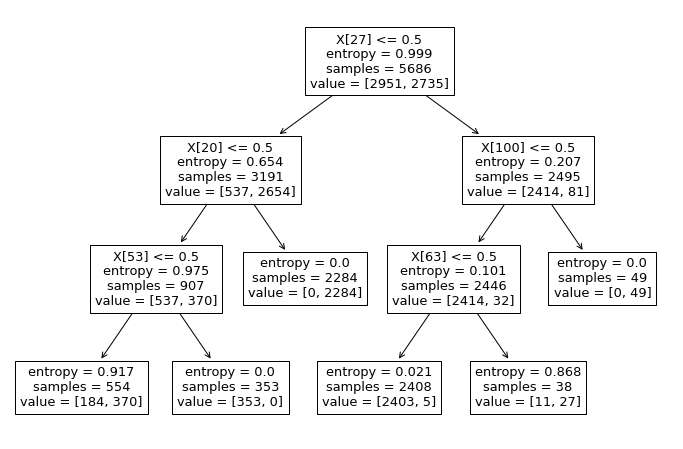

In [297]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(x_train,y_train))

In [298]:
#Implementing Random Forest Classifier
sodel=RandomForestClassifier(n_estimators=100,random_state=0)
sodel.fit(x_train,y_train)
y_pre=sodel.predict(x_test)
print(accuracy_score(y_test,y_pre))

1.0


In [311]:
#print the confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[1257    0]
 [   0 1181]]


In [299]:
#Checking for features importance
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x_train,y_train)
features_score=pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
features_score

odor_n                 0.137242
gill-size_b            0.076741
odor_f                 0.065062
gill-size_n            0.050491
gill-color_b           0.047351
                         ...   
spore-print-color_y    0.000000
spore-print-color_b    0.000000
veil-color_o           0.000000
veil-type_p            0.000000
gill-color_o           0.000000
Length: 117, dtype: float64

In [312]:
#print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



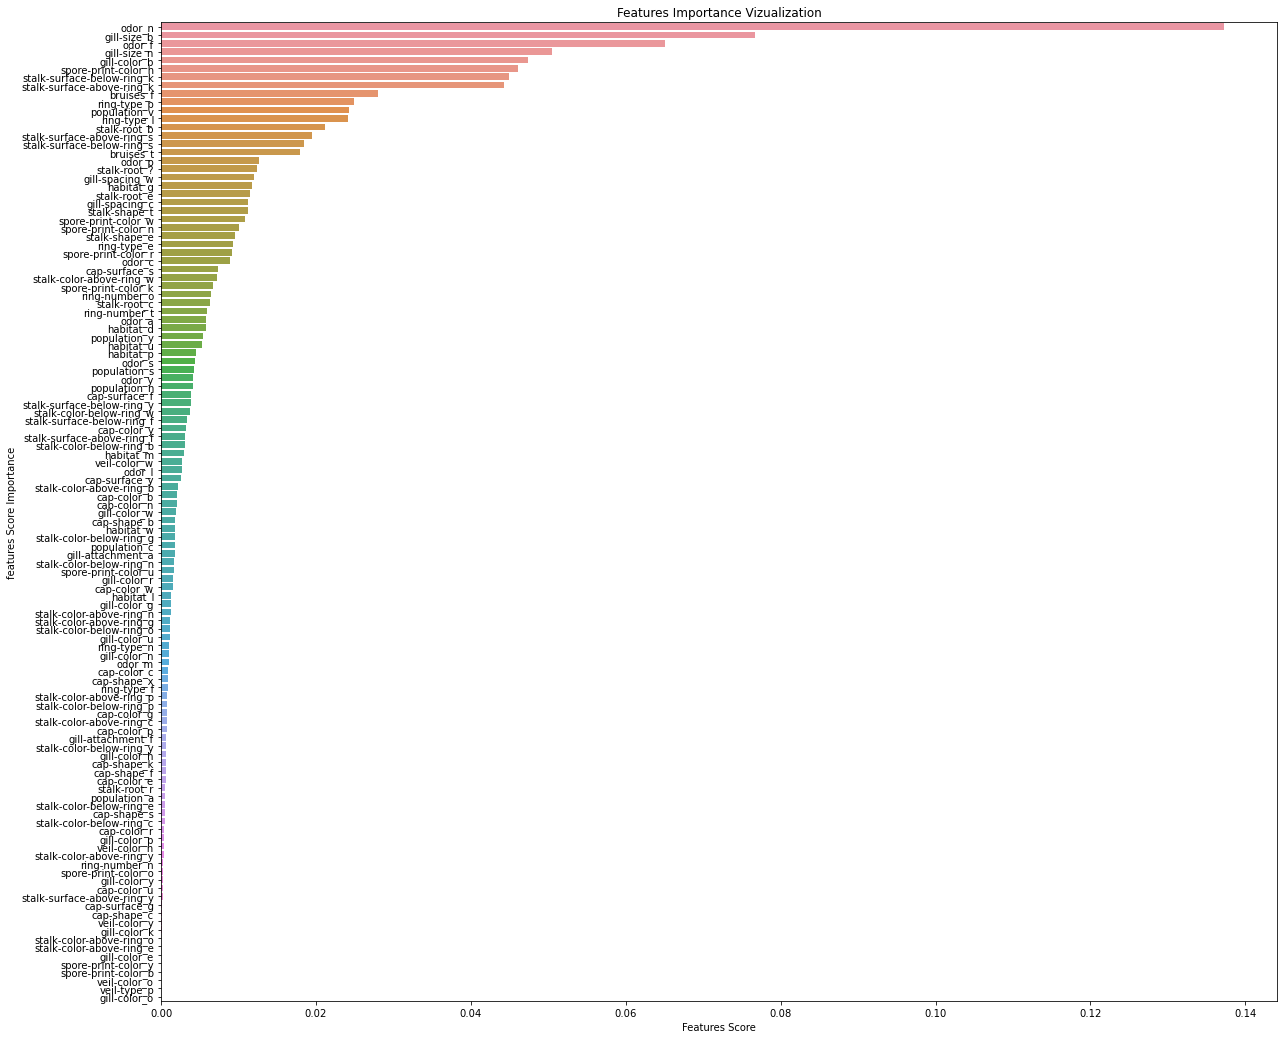

In [302]:
#Vizualize the features importance
plt.figure(figsize=(20,18))
sns.barplot(x=features_score,y=features_score.index)
plt.xlabel("Features Score")
plt.ylabel("features Score Importance")
plt.title("Features Importance Vizualization")
plt.show()


In [305]:
#Removing the less important coulms
modified_data=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size','stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number',
       'ring-type', 'population', 'habitat']
X=df_data[modified_data]
y=df_data["class"]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,population,habitat
0,x,s,n,t,p,f,c,n,e,e,s,s,w,w,o,p,s,u
1,x,s,y,t,a,f,c,b,e,c,s,s,w,w,o,p,n,g
2,b,s,w,t,l,f,c,b,e,c,s,s,w,w,o,p,n,m
3,x,y,w,t,p,f,c,n,e,e,s,s,w,w,o,p,s,u
4,x,s,g,f,n,f,w,b,t,e,s,s,w,w,o,e,a,g


In [307]:
#Data preprocessing
X=pd.get_dummies(X)
X
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [308]:
#Implement Randomforest Classifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print the accuracy score
print(accuracy_score(y_test,y_pred))

1.0


In [309]:
#print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[1257    0]
 [   0 1181]]


In [310]:
#print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

